In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('./EEG_data.csv')
data = pd.read_csv('./demographic_info.csv')

In [3]:
data = data.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [4]:
df.shape

(12811, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  age                 12811 non-null  int64  
 16  ethn

In [6]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [7]:
df['gender']=df['gender'].replace({'M':1,'F':0})
df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})
df.drop(columns = ['SubjectID','VideoID','predefinedlabel'],inplace=True)

In [8]:
df.shape

(12811, 15)

this is for checking null value

In [9]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

In [10]:
top_fea=df.drop(['user-definedlabeln'],axis=1)

In [11]:
scaler = StandardScaler()
X=scaler.fit_transform(top_fea)

In [12]:
X.shape

(12811, 14)

In [13]:
from sklearn.model_selection import train_test_split
y=df['user-definedlabeln']
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=108,test_size=0.27)

In [14]:
X_train.shape

(9352, 14)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [16]:
# Create an SVM classifier
svm_classifier = SVC(random_state=108)

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

SVC(random_state=108)

In [17]:
# Make predictions on the test data
predictions = svm_classifier.predict(x_test).astype(int)
predictions

array([0, 1, 1, ..., 0, 0, 0])

In [18]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.66493206128939

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

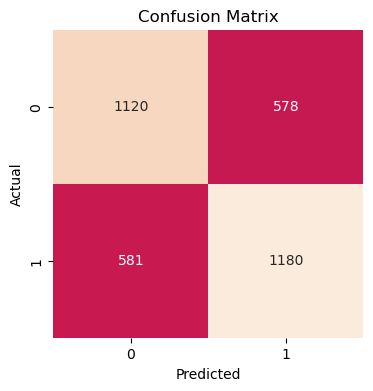

In [20]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

2023-12-04 21:30:55.090538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
inputs = tf.keras.Input(shape=(X_train.shape[1]))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]
             )
batch_size=32
epochs=50
history=model.fit(
            X_train,
            Y_train,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/50


2023-12-04 21:30:56.390231: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


234/234 [==============================] - 3s 9ms/step - loss: 0.6517 - accuracy: 0.6157 - auc: 0.6626 - val_loss: 0.6509 - val_accuracy: 0.6446 - val_auc: 0.6874 - lr: 0.0010
Epoch 2/50
234/234 [==============================] - 2s 7ms/step - loss: 0.6313 - accuracy: 0.6435 - auc: 0.6938 - val_loss: 0.6398 - val_accuracy: 0.6162 - val_auc: 0.6861 - lr: 0.0010
Epoch 3/50
234/234 [==============================] - 3s 13ms/step - loss: 0.6208 - accuracy: 0.6488 - auc: 0.7093 - val_loss: 0.6382 - val_accuracy: 0.6253 - val_auc: 0.7026 - lr: 0.0010
Epoch 4/50
234/234 [==============================] - 3s 15ms/step - loss: 0.6149 - accuracy: 0.6535 - auc: 0.7161 - val_loss: 0.6339 - val_accuracy: 0.6558 - val_auc: 0.7057 - lr: 0.0010
Epoch 5/50
234/234 [==============================] - 1s 6ms/step - loss: 0.6073 - accuracy: 0.6610 - auc: 0.7276 - val_loss: 0.6235 - val_accuracy: 0.6440 - val_auc: 0.7151 - lr: 0.0010
Epoch 6/50
234/234 [==============================] - 2s 8ms/step - loss: 

In [23]:
model.evaluate(x_test,y_test)

109/109 [==============================] - 1s 5ms/step - loss: 0.6062 - accuracy: 0.6701 - auc: 0.7442


[0.6062213778495789, 0.6701358556747437, 0.7442114353179932]

In [24]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict(x_test))
y_pred = np.array(y_pred >=0.5, dtype=np.int)
y_pred

109/109 [==============================] - 0s 4ms/step


/tmp/ipykernel_3133/295032384.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(y_pred >=0.5, dtype=np.int)


array([0, 0, 1, ..., 0, 1, 0])

In [25]:
accuracyKeras=accuracy_score(y_true, y_pred)
accuracyKeras

0.67013587742122